# <font color=gray>**Joining Data with Pandas**</font>

### <font color=orange>**Merging Ordered and Time-Series Data**</font>

In [1]:
import pandas as pd

In [2]:
gdp=pd.read_csv('./datasets/WorldBank_GDP.csv')
sp500=pd.read_csv('./datasets/S&P500.csv')

In [4]:
gdp.head()

,Country Name,Country Code,Indicator Name,Year,GDP
0,China,CHN,GDP (current US$),2010,6.087160e+12
1,Germany,DEU,GDP (current US$),2010,3.417090e+12
2,Japan,JPN,GDP (current US$),2010,5.700100e+12
3,United States,USA,GDP (current US$),2010,1.499210e+13
4,China,CHN,GDP (current US$),2011,7.551500e+12


In [5]:
sp500.head()

,Date,Returns
0,2008,-38.49
1,2009,23.45
2,2010,12.78
3,2011,0.00
4,2012,13.41


In [7]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', 
                             how='left')

# Print gdp_sp500
print(gdp_sp500)

     Country Name Country Code     Indicator Name  Year           GDP    Date  \
0           China          CHN  GDP (current US$)  2010  6.087160e+12  2010.0   
1         Germany          DEU  GDP (current US$)  2010  3.417090e+12  2010.0   
2           Japan          JPN  GDP (current US$)  2010  5.700100e+12  2010.0   
3   United States          USA  GDP (current US$)  2010  1.499210e+13  2010.0   
4           China          CHN  GDP (current US$)  2011  7.551500e+12  2011.0   
5         Germany          DEU  GDP (current US$)  2011  3.757700e+12  2011.0   
6           Japan          JPN  GDP (current US$)  2011  6.157460e+12  2011.0   
7   United States          USA  GDP (current US$)  2011  1.554260e+13  2011.0   
8           China          CHN  GDP (current US$)  2012  8.532230e+12  2012.0   
9         Germany          DEU  GDP (current US$)  2012  3.543980e+12  2012.0   
10          Japan          JPN  GDP (current US$)  2012  6.203210e+12  2012.0   
11  United States          U

In [9]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp,sp500,left_on='Year',right_on='Date',how='left',fill_method='ffill')


# Print gdp_sp500
print (gdp_sp500)

     Country Name Country Code     Indicator Name  Year           GDP  Date  \
0           China          CHN  GDP (current US$)  2010  6.087160e+12  2010   
1         Germany          DEU  GDP (current US$)  2010  3.417090e+12  2010   
2           Japan          JPN  GDP (current US$)  2010  5.700100e+12  2010   
3   United States          USA  GDP (current US$)  2010  1.499210e+13  2010   
4           China          CHN  GDP (current US$)  2011  7.551500e+12  2011   
5         Germany          DEU  GDP (current US$)  2011  3.757700e+12  2011   
6           Japan          JPN  GDP (current US$)  2011  6.157460e+12  2011   
7   United States          USA  GDP (current US$)  2011  1.554260e+13  2011   
8           China          CHN  GDP (current US$)  2012  8.532230e+12  2012   
9         Germany          DEU  GDP (current US$)  2012  3.543980e+12  2012   
10          Japan          JPN  GDP (current US$)  2012  6.203210e+12  2012   
11  United States          USA  GDP (current US$)  2

In [14]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', 
                             how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['GDP','Returns']]

# Print gdp_returns correlation
print (gdp_returns.corr())

              GDP   Returns
GDP      1.000000  0.040669
Returns  0.040669  1.000000


In [15]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation,unemployment,on='Date',how='inner')

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(x='unemployment_rate',y='cpi',kind='scatter')
plt.show()

NameError: name 'inflation' is not defined

In [16]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp,pop,on=['date','country'], 
                             fill_method='ffill')

# Print ctry_date
print(ctry_date)

NameError: name 'pop' is not defined

In [17]:
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp,pop,on=['country','date'],fill_method='ffill')

# Print date_ctry
print(date_ctry)

NameError: name 'pop' is not defined

In [18]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm,wells,on='date_time',suffixes=('', '_wells'),direction='nearest')


# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells,bac,on='date_time',suffixes=('_jpm','_bac'),direction='nearest')


# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm','close_wells','close_bac'])
plt.show()

NameError: name 'jpm' is not defined

In [19]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp,recession,on='date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

NameError: name 'recession' is not defined

In [20]:
#query

In [22]:
#step1
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp,pop, on=['country','date'],fill_method='ffill')

NameError: name 'pop' is not defined

In [23]:
#step2
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita']=gdp_pop['gdp']/gdp_pop['pop']

NameError: name 'pop' is not defined

In [24]:
#step3
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table(values='gdp_per_capita',index='date',columns='country')

NameError: name 'pop' is not defined

In [25]:
#step4
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot data so gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date>="1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

NameError: name 'pop' is not defined

In [26]:
#melt

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
inflation=[['Brazil', 'Inflation %', 3.45, 3.66, 3.73],
       ['Canada', 'Inflation %', 1.6, 2.27, 1.95],
       ['France', 'Inflation %', 1.03, 1.85, 1.11],
       ['India', 'Inflation %', 2.49, 4.86, 7.66]]

In [35]:
inflation=pd.DataFrame(inflation,columns=['country','indicator','2017','2018','2019'])

In [36]:
inflation

,country,indicator,2017,2018,2019
0,Brazil,Inflation %,3.45,3.66,3.73
1,Canada,Inflation %,1.60,2.27,1.95
2,France,Inflation %,1.03,1.85,1.11
3,India,Inflation %,2.49,4.86,7.66


In [37]:
inflation.melt(id_vars=['country','indicator'], var_name='year', value_name='annual')

,country,indicator,year,annual
0,Brazil,Inflation %,2017,3.45
1,Canada,Inflation %,2017,1.60
2,France,Inflation %,2017,1.03
3,India,Inflation %,2017,2.49
4,Brazil,Inflation %,2018,3.66
5,Canada,Inflation %,2018,2.27
6,France,Inflation %,2018,1.85
7,India,Inflation %,2018,4.86
8,Brazil,Inflation %,2019,3.73
9,Canada,Inflation %,2019,1.95


In [39]:
ur_wide=[['2010', 9.8, 9.8, 9.9, 9.9, 9.6, 9.4, 9.4, 9.5, 9.5, 9.4, 9.8,
        9.3],
       ['2011', 9.1, 9.0, 9.0, 9.1, 9.0, 9.1, 9.0, 9.0, 9.0, 8.8, 8.6,
        8.5],
       ['2012', 8.3, 8.3, 8.2, 8.2, 8.2, 8.2, 8.2, 8.1, 7.8, 7.8, 7.7,
        7.9],
       ['2013', 8.0, 7.7, 7.5, 7.6, 7.5, 7.5, 7.3, 7.2, 7.2, 7.2, 6.9,
        6.7],
       ['2014', 6.6, 6.7, 6.7, 6.2, 6.3, 6.1, 6.2, 6.1, 5.9, 5.7, 5.8,
        5.6],
       ['2015', 5.7, 5.5, 5.4, 5.4, 5.6, 5.3, 5.2, 5.1, 5.0, 5.0, 5.1,
        5.0],
       ['2016', 4.9, 4.9, 5.0, 5.0, 4.8, 4.9, 4.8, 4.9, 5.0, 4.9, 4.7,
        4.7],
       ['2017', 4.7, 4.6, 4.4, 4.4, 4.4, 4.3, 4.3, 4.4, 4.2, 4.1, 4.2,
        4.1],
       ['2018', 4.1, 4.1, 4.0, 4.0, 3.8, 4.0, 3.8, 3.8, 3.7, 3.8, 3.7,
        3.9],
       ['2019', 4.0, 3.8, 3.8, 3.6, 3.6, 3.7, 3.7, 3.7, 3.5, 3.6, 3.5,
        3.5],
       ['2020', 3.6, 3.5, 4.4, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
        np.nan]]

In [42]:
ur_wide=pd.DataFrame(ur_wide,columns=['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

In [41]:
ur_wide

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2010,9.8,9.8,9.9,9.9,9.6,9.4,9.4,9.5,9.5,9.4,9.8,9.3
1,2011,9.1,9.0,9.0,9.1,9.0,9.1,9.0,9.0,9.0,8.8,8.6,8.5
2,2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
3,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
4,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
5,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
6,2016,4.9,4.9,5.0,5.0,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
7,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.2,4.1,4.2,4.1
8,2018,4.1,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.7,3.9
9,2019,4.0,3.8,3.8,3.6,3.6,3.7,3.7,3.7,3.5,3.6,3.5,3.5


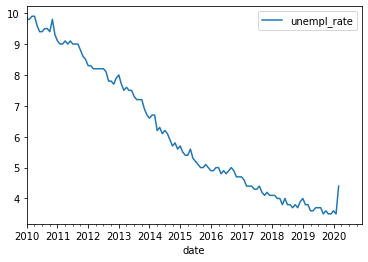

In [45]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=['year'],var_name='month',value_name='unempl_rate')


# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall['month'])

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values('date')

# Plot the unempl_rate by date
ur_sorted.plot(x='date',y='unempl_rate')
plt.show()

In [48]:
ten_yr=pd.DataFrame([['open', 0.033490769, -0.060448691, 0.025425602000000002,
        -0.004312204, 0.060632307999999996, 0.02715394,
        -0.059232757000000004, -0.046270864, 0.014399646,
        -0.027080148999999998, -0.114702581, 0.022565922999999998,
        -0.09447061699999999, -0.024644031, -0.021336327999999998,
        0.07601835900000001, 0.073047187, -0.020621118, 0.0,
        -0.024099442000000002, -0.025734338, 0.05042689400000001,
        -0.267716535, -0.23586541800000002, 0.285973672,
        0.045887752000000004, -0.102598718, 0.191049267,
        0.10672560800000001, 0.023965762999999998, -0.006687099,
        -0.046563815, -0.032068255, 0.034346505, -0.050543637999999995],
       ['high', -0.007337954, -0.040657083999999996, 0.022046233,
        0.030575916, 0.08026823799999999, -0.021632807, -0.059796193,
        -0.038445808, 0.003615483, -0.055520237, -0.039488445,
        -0.053492175, -0.022704837000000002, -0.064646465, 0.049676026,
        0.064557613, 0.044696787, -0.034690102, -0.020124581000000002,
        -0.045232274, 0.052240717, -0.035288391, -0.27169525699999997,
        -0.01073779, 0.06932773099999999, -0.004256713,
        0.04110490000000001, 0.186986734, 0.068121341, -0.061783757,
        0.031864047, -0.090324241, 0.012446958999999999, -0.004191115,
        0.099326599],
       ['low', -0.016146629, -0.007984032, 0.031075341,
        -0.0021682570000000003, 0.059104737000000004, -0.027287649,
        -0.051676861, -0.043371886, 0.002557545, -0.10830241199999999,
        -0.00130039, -0.145572917, 0.074672356, -0.067498582,
        0.043187348, 0.073469388, 0.047256926, -0.022562241,
        -0.001591934, -0.13632739800000002, 0.046153846, -0.138235294,
        -0.30443686, 0.059371932999999995, 0.21723019899999998,
        -0.062404870999999994, 0.068993506, 0.16818527,
        0.12317192099999999, -0.055266204000000006, 0.039509954,
        -0.035945787, -0.050733495999999996, 0.030264005, 0.0071875],
       ['close', -0.05719022, 0.021538462, -0.003872633, 0.056155508,
        0.029243354, -0.052056427999999995, -0.049046322,
        0.009257218000000001, -0.022712383, -0.112402235, 0.015861027,
        -0.098141264, -0.028854081, -0.028862479, 0.09527972,
        0.076350093, -0.016559565, 0.0, -0.041719025, 0.00367165,
        0.037366083, -0.25516372800000003, -0.24112276, 0.267379679,
        0.069268636, -0.11706675400000001, 0.163500931, 0.10915493,
        0.016738817, -0.006244678, -0.028563268, -0.02763893,
        0.025703054, -0.056308962000000004, 0.200562324]],columns=['metric', '2007-02-01', '2007-03-01', '2007-04-01', '2007-05-01', '2007-06-01', '2007-07-01', '2007-08-01', '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01', '2008-01-01', '2008-02-01',
       '2008-03-01', '2008-04-01', '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01', '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01', '2009-03-01',
       '2009-04-01', '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01', '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01'])

In [49]:
ten_yr

,metric,2007-02-01,2007-03-01,2007-04-01,2007-05-01,2007-06-01,2007-07-01,2007-08-01,2007-09-01,2007-10-01,...,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01
0,open,0.033491,-0.060449,0.025426,-0.004312,0.060632,0.027154,-0.059233,-0.046271,0.014400,...,0.045888,-0.102599,0.191049,0.106726,0.023966,-0.006687,-0.046564,-0.032068,0.034347,-0.050544
1,high,-0.007338,-0.040657,0.022046,0.030576,0.080268,-0.021633,-0.059796,-0.038446,0.003615,...,-0.004257,0.041105,0.186987,0.068121,-0.061784,0.031864,-0.090324,0.012447,-0.004191,0.099327
2,low,-0.016147,-0.007984,0.031075,-0.002168,0.059105,-0.027288,-0.051677,-0.043372,0.002558,...,-0.062405,0.068994,0.168185,0.123172,-0.055266,0.039510,-0.035946,-0.050733,0.030264,0.007188
3,close,-0.057190,0.021538,-0.003873,0.056156,0.029243,-0.052056,-0.049046,0.009257,-0.022712,...,-0.117067,0.163501,0.109155,0.016739,-0.006245,-0.028563,-0.027639,0.025703,-0.056309,0.200562


In [52]:
dji=pd.DataFrame([['2007-02-01', 0.005094385],
       ['2007-03-01', -0.02613902],
       ['2007-04-01', 0.04852522],
       ['2007-05-01', 0.052007442],
       ['2007-06-01', -0.016070328000000002],
       ['2007-07-01', 0.038005504],
       ['2007-08-01', -0.063894742],
       ['2007-09-01', 0.066521287],
       ['2007-10-01', 0.002475632],
       ['2007-11-01', -0.024041665],
       ['2007-12-01', -0.01062883],
       ['2008-01-01', -0.059491712999999995],
       ['2008-02-01', -0.035595773],
       ['2008-03-01', 0.013213023],
       ['2008-04-01', 0.020871591999999998],
       ['2008-05-01', -0.00143428],
       ['2008-06-01', -0.042702328],
       ['2008-07-01', -0.057398135],
       ['2008-08-01', 0.025433807000000003],
       ['2008-09-01', -0.069100093],
       ['2008-10-01', -0.15418084599999998],
       ['2008-11-01', -0.080309949],
       ['2008-12-01', 0.058127134000000004],
       ['2009-01-01', -0.037496447999999995],
       ['2009-02-01', -0.16479474300000002],
       ['2009-03-01', 0.042397187999999995],
       ['2009-04-01', 0.064512765],
       ['2009-05-01', 0.05677603],
       ['2009-06-01', 0.038969204],
       ['2009-07-01', -0.047834178],
       ['2009-08-01', 0.11097163],
       ['2009-09-01', 0.05759352],
       ['2009-10-01', -0.007827874],
       ['2009-11-01', 0.07739017599999999],
       ['2009-12-01', -0.003478498],
       ['2010-01-01', -0.022410836],
       ['2010-02-01', 0.012850318999999999],
       ['2010-03-01', 0.050855723],
       ['2010-04-01', 0.01551093],
       ['2010-05-01', -0.080054868],
       ['2010-06-01', -0.035769399],
       ['2010-07-01', 0.078133736],
       ['2010-08-01', -0.034476195],
       ['2010-09-01', 0.067414235],
       ['2010-10-01', 0.023774684],
       ['2010-11-01', -0.002383415],
       ['2010-12-01', 0.039776433],
       ['2011-01-01', 0.031101532],
       ['2011-02-01', 0.014329031],
       ['2011-03-01', -0.0021388789999999998],
       ['2011-04-01', 0.032418077999999996],
       ['2011-05-01', 0.001198984],
       ['2011-06-01', -0.002194236],
       ['2011-07-01', 0.002626051],
       ['2011-08-01', -0.06695646],
       ['2011-09-01', -0.03640589],
       ['2011-10-01', 0.025681987000000003],
       ['2011-11-01', 0.001359161],
       ['2011-12-01', 0.045912125],
       ['2012-01-01', 0.052597849],
       ['2012-02-01', 0.017741846000000002],
       ['2012-03-01', 0.025919756000000002],
       ['2012-04-01', -0.009181033],
       ['2012-05-01', -0.053259198],
       ['2012-06-01', 0.034768257000000004],
       ['2012-07-01', -0.00014041799999999998],
       ['2012-08-01', 0.0350163],
       ['2012-09-01', 0.024247324],
       ['2012-10-01', -0.018273602],
       ['2012-11-01', -0.026968932],
       ['2012-12-01', 0.011859747],
       ['2013-01-01', 0.028023244],
       ['2013-02-01', 0.036520977999999996],
       ['2013-03-01', 0.023491879],
       ['2013-04-01', 0.037377411],
       ['2013-05-01', 0.016851552],
       ['2013-06-01', -0.000224894],
       ['2013-07-01', 0.025628287000000003],
       ['2013-08-01', -0.042491667999999996],
       ['2013-09-01', 0.028118227000000003],
       ['2013-10-01', 0.007576228000000001],
       ['2013-11-01', 0.032678999],
       ['2013-12-01', 0.018379701000000002],
       ['2014-01-01', 0.015901757],
       ['2014-02-01', -0.014940513],
       ['2014-03-01', 0.014771536000000002],
       ['2014-04-01', 0.007107820999999999],
       ['2014-05-01', 0.010994522],
       ['2014-06-01', 0.006544182],
       ['2014-07-01', -0.993017009],
       ['2014-08-01', 144.5183012],
       ['2014-09-01', -0.003245918],
       ['2014-10-01', 0.020395567],
       ['2014-11-01', 0.025168869],
       ['2014-12-01', -0.000286042],
       ['2015-01-01', -0.03692956],
       ['2015-02-01', 0.056382432],
       ['2015-03-01', -0.019666107],
       ['2015-04-01', 0.014750208],
       ['2015-05-01', -0.0015301639999999999],
       ['2015-06-01', -0.021720378999999998],
       ['2015-07-01', 0.006379318],
       ['2015-08-01', -0.067894606],
       ['2015-09-01', -0.025750218],
       ['2015-10-01', 0.096948254],
       ['2015-11-01', 0.003193047],
       ['2015-12-01', -0.016642328],
       ['2016-01-01', -0.055018607000000004],
       ['2016-02-01', 0.003048603],
       ['2016-03-01', 0.070753465],
       ['2016-04-01', 0.0050042129999999995],
       ['2016-05-01', 0.000765158],
       ['2016-06-01', 0.008028289000000001],
       ['2016-07-01', 0.02800888],
       ['2016-08-01', -0.001698052],
       ['2016-09-01', -0.005037860999999999],
       ['2016-10-01', -0.009055988000000001],
       ['2016-11-01', 0.054083208],
       ['2016-12-01', 0.033414211],
       ['2017-01-01', 0.005135964],
       ['2017-02-01', 0.047729302],
       ['2017-03-01', -0.007159263000000001],
       ['2017-04-01', 0.013420031],
       ['2017-05-01', 0.0032568090000000003],
       ['2017-06-01', 0.01622663],
       ['2017-07-01', 0.025363472999999997],
       ['2017-08-01', 0.002603798],
       ['2017-09-01', 0.020821848],
       ['2017-10-01', 0.04338742599999999],
       ['2017-11-01', 0.038293773999999996],
       ['2017-12-01', 0.01840769],
       ['2018-01-01', 0.057857909000000006],
       ['2018-02-01', -0.042838503],
       ['2018-03-01', -0.034663499],
       ['2018-04-01', 6.208199999999999e-05],
       ['2018-05-01', 0.010458144],
       ['2018-06-01', -0.005914219],
       ['2018-07-01', 0.047125374000000005],
       ['2018-08-01', 0.021624917],
       ['2018-09-01', 0.019006501000000002],
       ['2018-10-01', -0.05074022],
       ['2018-11-01', 0.016830012],
       ['2018-12-01', -0.08657517099999999],
       ['2019-01-01', 0.071683602],
       ['2019-02-01', 0.036652472],
       ['2019-03-01', 0.000490015],
       ['2019-04-01', 0.025616447999999997],
       ['2019-05-01', -0.066856205],
       ['2019-06-01', 0.07810595299999999],
       ['2019-07-01', np.nan],
       ['2019-08-01', np.nan],
       ['2019-09-01', np.nan],
       ['2019-10-01', 0.006778502],
       ['2019-11-01', np.nan],
       ['2019-12-01', np.nan],
       ['2020-01-01', np.nan],
       ['2020-02-01', -0.010447310999999999],
       ['2020-03-01', -0.216145511],
       ['2020-04-01', 0.034803753]],columns=['date', 'close'])

In [53]:
dji

,date,close
0,2007-02-01,0.005094
1,2007-03-01,-0.026139
2,2007-04-01,0.048525
3,2007-05-01,0.052007
4,2007-06-01,-0.016070
...,...,...
154,2019-12-01,NaN
155,2020-01-01,NaN
156,2020-02-01,-0.010447
157,2020-03-01,-0.216146


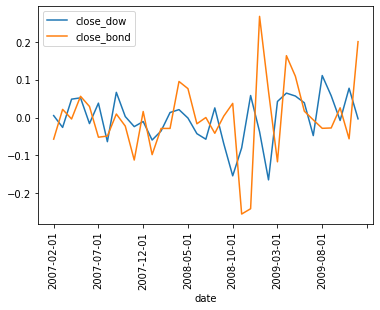

In [54]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars='metric',var_name='date',value_name='close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query("metric=='close'")

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji,bond_perc_close,on='date',suffixes=('_dow','_bond'),how='inner')

# Plot only the close_dow and close_bond columns
dow_bond.plot(y=['close_dow','close_bond'], x='date', rot=90)
plt.show()